In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
from matplotlib.patches import Polygon
from datetime import datetime
from dateutil.relativedelta import relativedelta
from sklearn.preprocessing import StandardScaler
pd.set_option('max_columns', 50)
plt.style.use('bmh')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [2]:
!ls ./data

calendar.csv		    sample_submission.csv
sales_train_validation.csv  sell_prices.csv


In [50]:
DATA_DIR = './data'
calendar = pd.read_csv('{}/calendar.csv'.format(DATA_DIR))
strain = pd.read_csv('{}/sales_train_validation.csv'.format(DATA_DIR))
ssubm = pd.read_csv('{}/sample_submission.csv'.format(DATA_DIR))
sprices = pd.read_csv('{}/sell_prices.csv'.format(DATA_DIR))

In [4]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [5]:
strain.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,...,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4


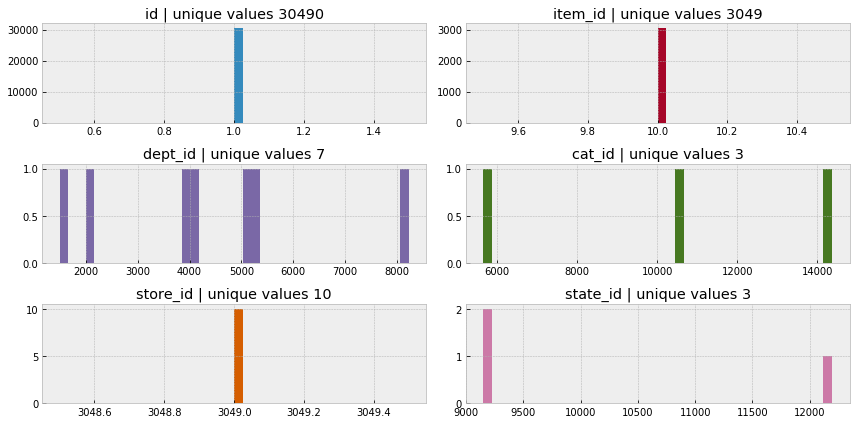

In [6]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 6))
ax = ax.flatten()
i = 0
for i, col in enumerate([x for x in strain.columns if 'id' in x]):
    ax[i].hist(strain[col].value_counts(), color=next(color_cycle), bins=40)
    ax[i].set_title('{} | unique values {}'.format(col, len(strain[col].unique())))
    i += 1
plt.tight_layout()
plt.show()

In [7]:
ssubm.head()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
sprices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


len data columns: 1913 start: d_1 end: d_1913
prodict id sample:
 0    HOBBIES_1_001_CA_1_validation
1    HOBBIES_1_002_CA_1_validation
2    HOBBIES_1_003_CA_1_validation
Name: id, dtype: object


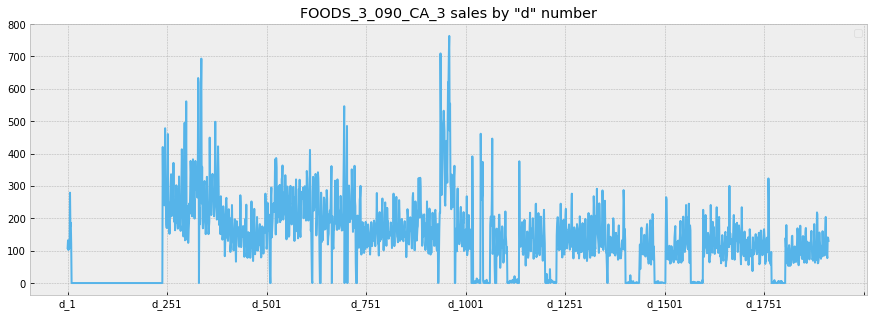

In [9]:
d_cols = [c for c in strain.columns if 'd_' in c]
print('len data columns:', len(d_cols), 'start:', d_cols[0], 'end:', d_cols[-1])
print('prodict id sample:\n', strain['id'][:3])
strain.loc[strain['id'] == 'FOODS_3_090_CA_3_validation'].set_index('id')[d_cols].T.plot(
    figsize=(15, 5),
    title='FOODS_3_090_CA_3 sales by "d" number',
    color=next(color_cycle)
)
plt.legend('')
plt.show()

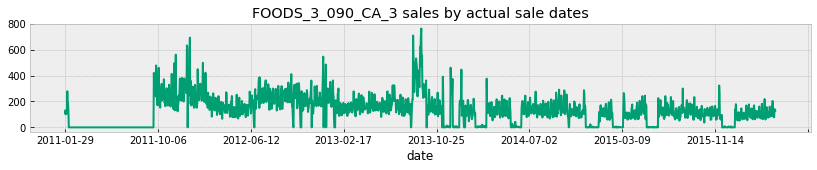

In [10]:
def draw_sample(sample_id):
    sample = strain.loc[strain['id'] == sample_id][d_cols].T
    sample_num = sample.columns[0]
    name = sample_id.replace('_validation', '')
    sample.rename(columns={sample_num: name}, inplace=True)
    sample.reset_index(inplace=True)
    sample.rename(columns={'index': 'd'}, inplace=True)
    sample = sample.merge(calendar, how='left', validate='1:1')
    sample.set_index('date')[name].plot(
        figsize=(14, 2),
        color=next(color_cycle),
        title='{} sales by actual sale dates'.format(name)
    )
draw_sample('FOODS_3_090_CA_3_validation')

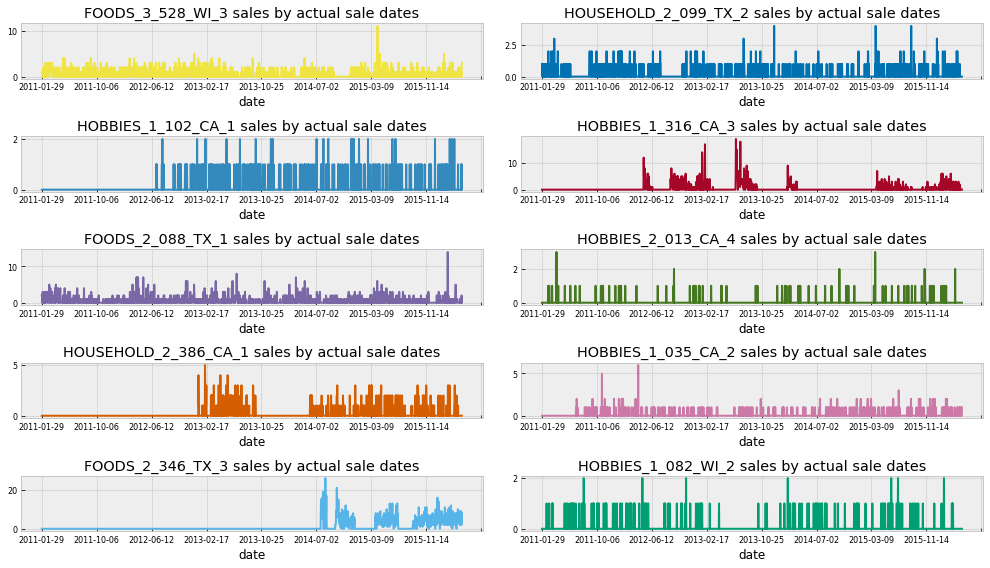

In [11]:
def draw_many_samples(samples_num=10):
    fig, axs = plt.subplots(int(samples_num / 2), 2, figsize=(14, 8))
    axs = axs.flatten()
    ax_idx = 0
    for sample_id in strain.sample(samples_num)['id'].values:
        sample = strain.loc[strain['id'] == sample_id][d_cols].T
        sample_num = sample.columns[0]
        name = sample_id.replace('_validation', '')
        sample.rename(columns={sample_num: name}, inplace=True)
        sample.reset_index(inplace=True)
        sample.rename(columns={'index': 'd'}, inplace=True)
        sample = sample.merge(calendar, how='left', validate='1:1')
        sample.set_index('date')[name].plot(
            color=next(color_cycle),
            title='{} sales by actual sale dates'.format(name),
            fontsize=8,
            ax=axs[ax_idx]
        )
        ax_idx += 1
    plt.tight_layout()
    plt.show()
draw_many_samples(10)

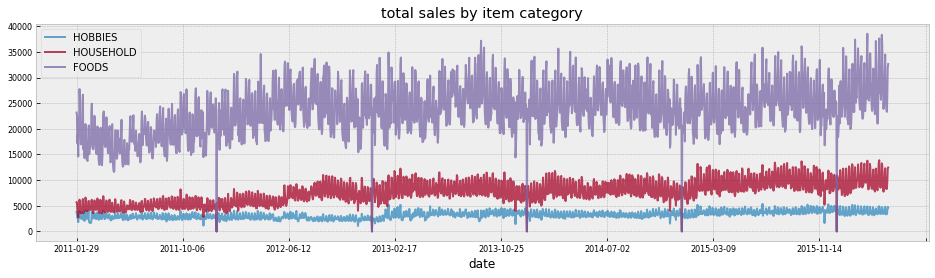

In [12]:
sales = strain.set_index('id')[d_cols].T.merge(
    calendar.set_index('d')['date'],
    left_index=True,
    right_index=True,
    validate='1:1'
).set_index('date')
for cat_i in strain['cat_id'].unique():
    items_col = [col for col in sales.columns if cat_i in col]
    sales[items_col].sum(axis=1).plot(
        figsize=(16, 4),
        alpha=.75,
        fontsize=8,
        title='total sales by item category'
    )
plt.legend(strain['cat_id'].unique())
plt.show()

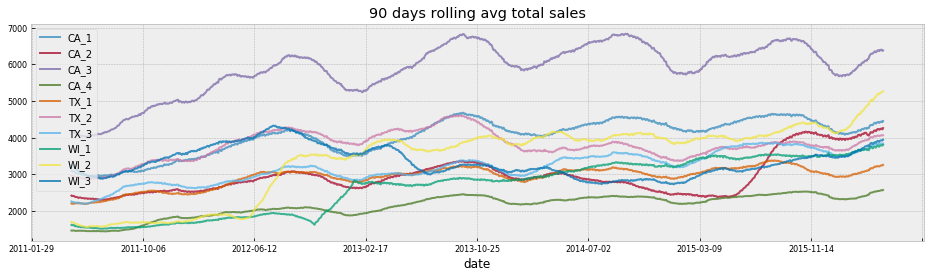

In [13]:
stores = sprices['store_id'].unique()
for store in stores:
    store_items = [col for col in sales.columns if store in col]
    sales[store_items].sum(axis=1).rolling(90).mean().plot(
        figsize=(16, 4),
        alpha=.75,
        fontsize=8,
        title='90 days rolling avg total sales'
    )
plt.legend(stores)
plt.show()

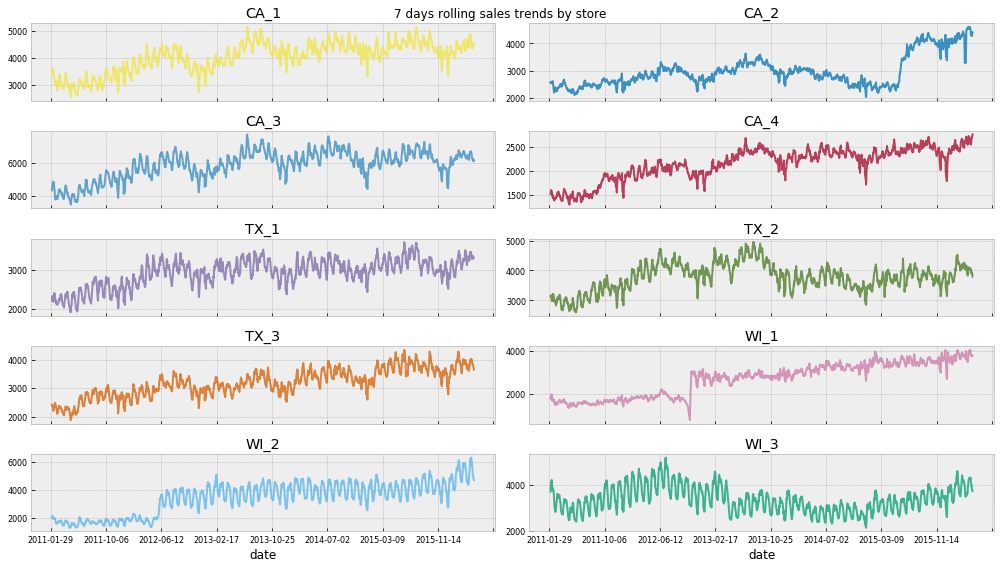

In [14]:
fig, ax = plt.subplots(5, 2, figsize=(14, 8), sharex=True)
ax = ax.flatten()
ax_i = 0
roll = 7
for store in stores:
    store_items = [col for col in sales.columns if store in col]
    sales[store_items].sum(axis=1).rolling(roll).mean().plot(
        alpha=.75,
        ax=ax[ax_i],
        title=store,
        color=next(color_cycle),
        fontsize=8
    )
    ax_i += 1
plt.suptitle('{} days rolling sales trends by store'.format(roll))
plt.tight_layout()
plt.show()

In [15]:
def calmap(ax, year, data):
    ax.tick_params('x', length=0, labelsize="medium", which='major')
    ax.tick_params('y', length=0, labelsize="x-small", which='major')
    #---month borders---
    xticks, labels = [], []
    start = datetime(year, 1, 1).weekday()
    for month in range(1,13):
        first = datetime(year, month, 1)
        last = first + relativedelta(months=1, days=-1)
        y0 = first.weekday()
        y1 = last.weekday()
        x0 = (int(first.strftime("%j")) + start - 1) // 7
        x1 = (int(last.strftime("%j")) + start - 1) // 7
        P = [
            (x0, y0), (x0, 7), (x1, 7),
            (x1, y1 + 1), (x1 + 1, y1+1), (x1 + 1, 0),
            (x0 + 1, 0), (x0 + 1, y0)
        ]
        xticks.append(x0 + (x1 - x0 + 1) / 2)
        labels.append(first.strftime("%b"))
        poly = Polygon(P, edgecolor="black", facecolor="None",
                       linewidth=1, zorder=20, clip_on=False)
        ax.add_artist(poly)
    ax.set_xticks(xticks)
    ax.set_xticklabels(labels)
    ax.set_yticks(.5 + np.arange(7))
    ax.set_yticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
    ax.set_title("{}".format(year), weight="semibold")
    #---clearing first and last day from the data---
    valid = datetime(year, 1, 1).weekday()
    data[:valid, 0] = np.nan
    valid = datetime(year, 12, 31).weekday()
    # data[:,x1+1:] = np.nan
    data[valid + 1:, x1] = np.nan
    #---showing data---
    ax.imshow(
        data, 
        extent=[0, 53, 0, 7], 
        zorder=10, 
        vmin=-1, 
        vmax=1,
        cmap="RdYlBu_r", 
        origin="lower", 
        alpha=.75
    )

In [16]:
print('lowest sale date was:', 
      sales.sum(axis=1).sort_values().index[0],
     'with', 
      sales.sum(axis=1).sort_values().values[0], 
      'sales')
print('lowest sale date was:', 
      sales.sum(axis=1).sort_values(ascending=False).index[0],
     'with', 
      sales.sum(axis=1).sort_values(ascending=False).values[0], 
      'sales')

lowest sale date was: 2012-12-25 with 11 sales
lowest sale date was: 2016-03-06 with 57218 sales


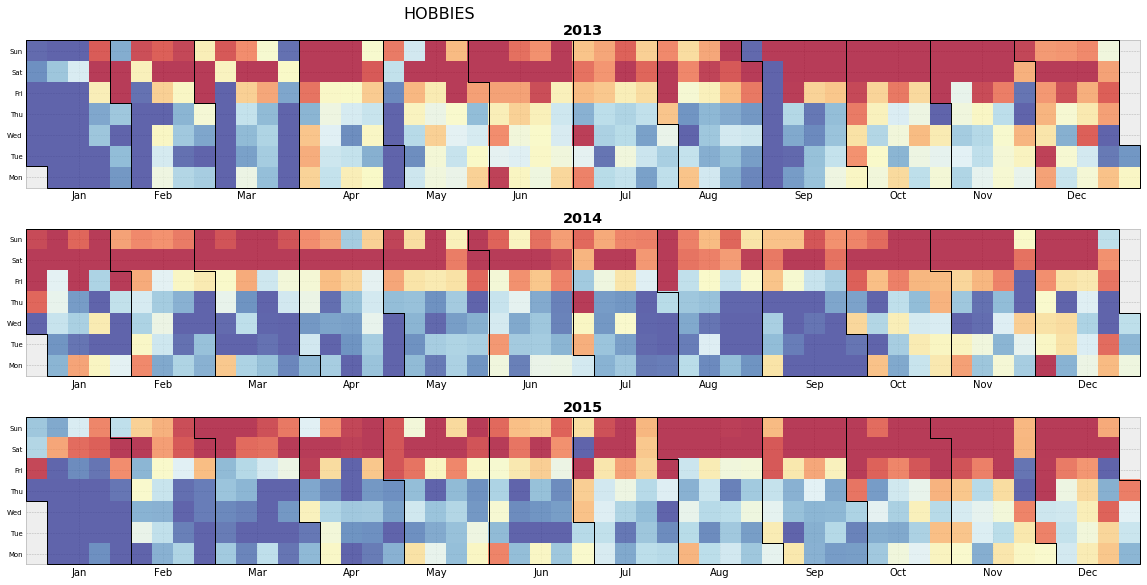

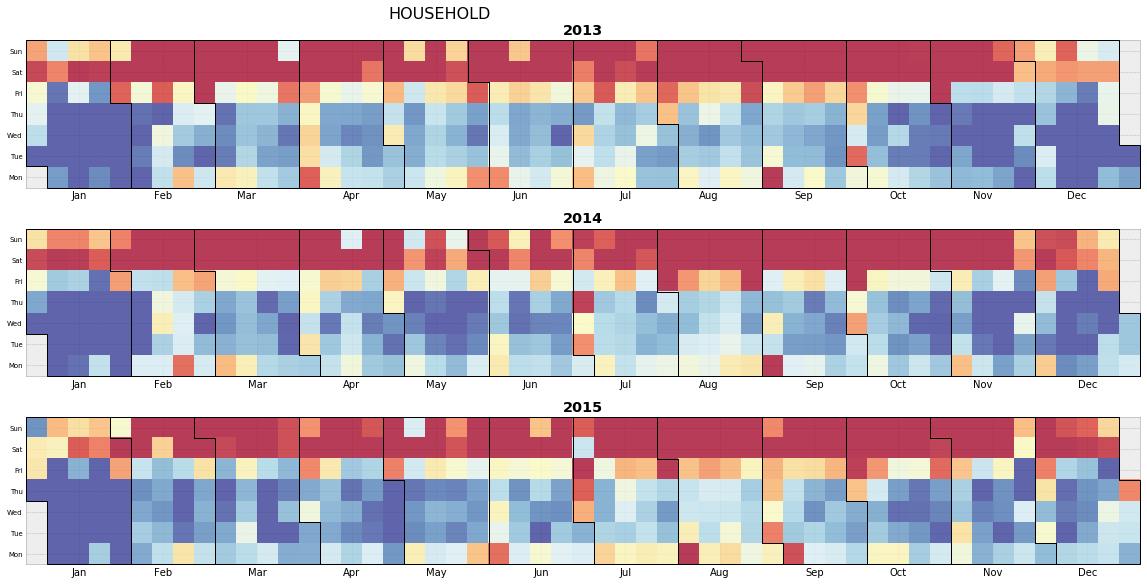

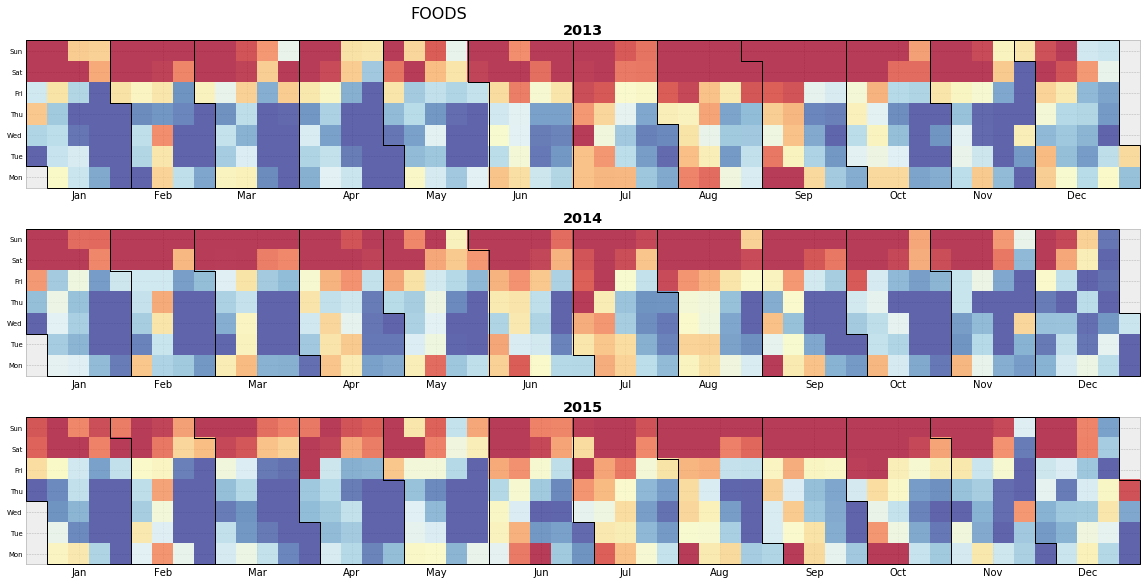

In [21]:
std_scaler = StandardScaler()
sales.index = pd.to_datetime(sales.index)
for cat_i in strain['cat_id'].unique():
    fig, ax = plt.subplots(3, 1, figsize=(20, 8))
    items_col = [col for col in sales.columns if cat_i in col]
    sales2013 = sales.loc[sales.index.isin(pd.date_range('31-Dec-2012',
                                                         periods=371))][items_col].mean(axis=1)
    vals = np.hstack(std_scaler.fit_transform(sales2013.values.reshape(-1, 1)))
    calmap(ax[0], 2013, vals.reshape(53, 7).T)
    sales2014 = sales.loc[sales.index.isin(pd.date_range('30-Dec-2013',
                                                         periods=371))][items_col].mean(axis=1)
    vals = np.hstack(std_scaler.fit_transform(sales2014.values.reshape(-1, 1)))
    calmap(ax[1], 2014, vals.reshape(53, 7).T)
    sales2015 = sales.loc[sales.index.isin(pd.date_range('29-Dec-2014',
                                                         periods=371))][items_col].mean(axis=1)
    vals = np.hstack(std_scaler.fit_transform(sales2015.values.reshape(-1, 1)))
    calmap(ax[2], 2015, vals.reshape(53, 7).T)
    plt.suptitle(cat_i, fontsize=16, x=.4, y=1.01)
    plt.tight_layout()
    plt.show()

In [40]:
sprices

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
...,...,...,...,...
6841116,WI_3,FOODS_3_827,11617,1.00
6841117,WI_3,FOODS_3_827,11618,1.00
6841118,WI_3,FOODS_3_827,11619,1.00
6841119,WI_3,FOODS_3_827,11620,1.00


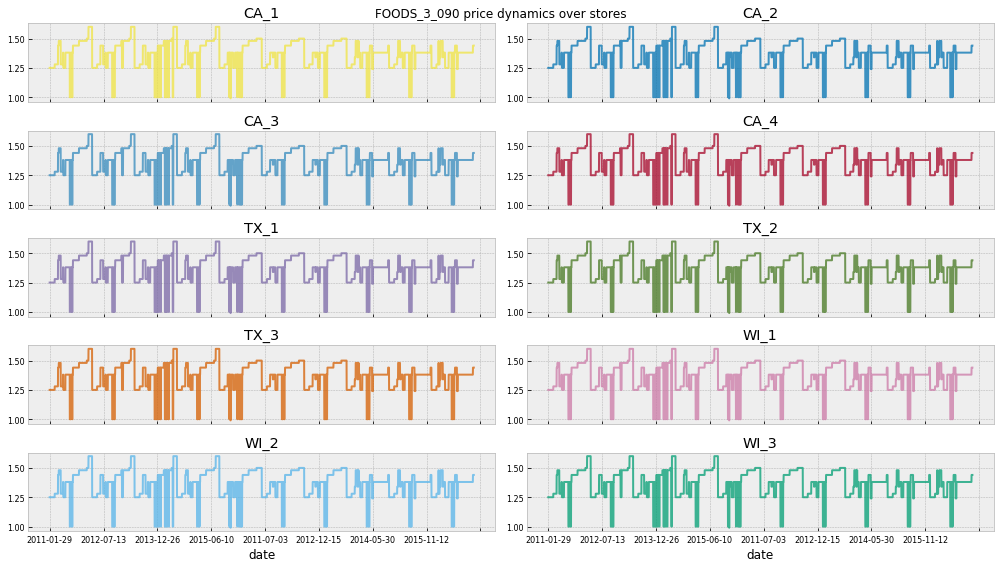

In [42]:
fig, ax = plt.subplots(5, 2, figsize=(14, 8), sharex=True)
ax = ax.flatten()
ax_i = 0
roll = 7
item_name = 'FOODS_3_090' #FOODS_3_827 HOBBIES_1_001
prices_over_time = sprices[sprices['item_id'] == item_name].merge(
    calendar, 
    on='wm_yr_wk', 
    how='left'
).set_index('date')
for store in stores:
    prices_over_time['sell_price'].plot(
        alpha=.75,
        ax=ax[ax_i],
        title=store,
        color=next(color_cycle),
        fontsize=8
    )
    ax_i += 1
plt.suptitle('{} price dynamics over stores'.format(item_name))
plt.tight_layout()
plt.show()

In [53]:
thirty_days_avg_map = strain.set_index('id')[d_cols[-30:]].mean(axis=1).to_dict()

In [54]:
forecast_columns = [col for col in ssubm.columns if 'F' in col]
print(ssubm.shape)
for col in forecast_columns:
    ssubm[col] = ssubm['id'].map(thirty_days_avg_map).fillna(0)
print(ssubm.shape)

(60980, 29)
(60980, 29)


In [55]:
ssubm.head()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667
1,HOBBIES_1_002_CA_1_validation,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333
2,HOBBIES_1_003_CA_1_validation,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667
3,HOBBIES_1_004_CA_1_validation,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000
4,HOBBIES_1_005_CA_1_validation,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667


In [56]:
ssubm.to_csv('submission.csv', index=False)